In [213]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


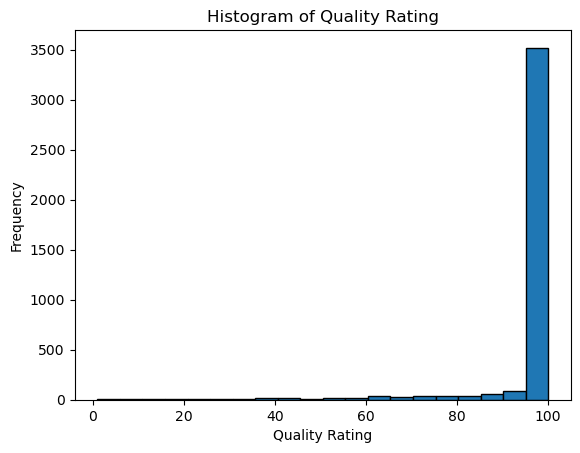

Quality Rating                    1.000000
Pressure (kPa)                    0.013129
Temperature x Pressure           -0.258474
Temperature (°C)                 -0.461279
Material Fusion Metric           -0.511972
Material Transformation Metric   -0.575756
Name: Quality Rating, dtype: float64


In [214]:
# Step 1: Data Preprocessing
# Load the dataset
data = pd.read_csv("../datasets/manufacturing.csv")

# Handle missing values if any
data.fillna(0, inplace=True)

# Check for data imbalance
plt.hist(data['Quality Rating'], bins=20, edgecolor='black')
plt.title('Histogram of Quality Rating')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
plt.show()

# Analyse correlations with QualityRating
corr_matrix = data.corr()
target_corr = corr_matrix['Quality Rating'].drop('Quality Rating')  # Exclude the target itself
print(corr_matrix['Quality Rating'].sort_values(ascending=False))


In [251]:
# Step 2: Feature Selection
# # Drop features with low correlation (example: absolute value < 0.1)
# low_corr_features = target_corr[abs(target_corr) < 0.01].index
# print("Features to drop due to low correlation:", low_corr_features)

# X = data.drop(['Quality Rating'] + list(low_corr_features), axis=1)
X = data.drop(['Quality Rating'], axis=1)
y = data['Quality Rating']

# Scale X
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Generate polynomial features
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_scaled)

# Convert X_poly to DataFrame with feature names
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# for feature in X_poly_df.columns:
#     plt.scatter(X_poly_df[feature], y)
#     plt.title(f"Scatterplot: {feature} vs Quality Rating")
#     plt.xlabel(feature)
#     plt.ylabel("Quality Rating")
#     plt.show()



In [252]:
# Step 3: Model Selection
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [253]:
# Step 4: Model Training

# Handling imbalanced data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize and train the Random Forest Classifier
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


LinearRegression()

Mean Absolute Error: 0.5569082463813511
Mean Squared Error: 0.5956731382210567
Root Mean Squared Error: 0.7717986383902583
R^2 Score: 0.9970821877707733


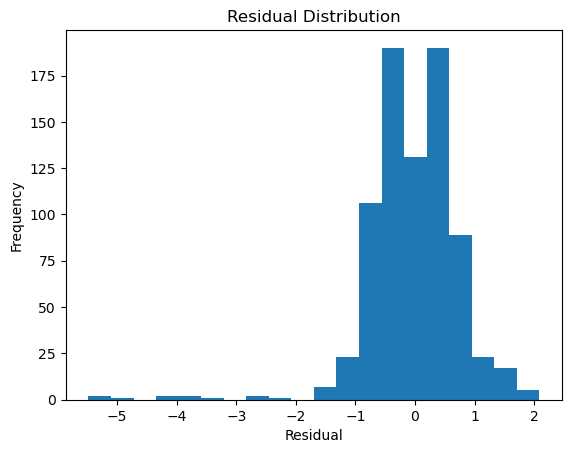

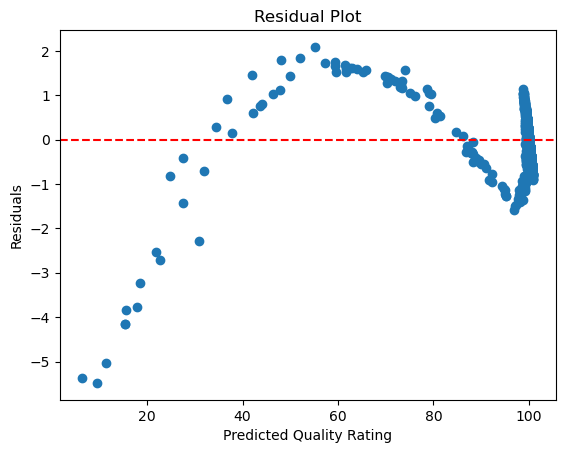

In [254]:
# Step 5: Model Evaluation
# Predictions
y_pred = linear_regressor.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Residuals histogram
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Residuals scatterplot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Quality Rating')
plt.ylabel('Residuals')
plt.show()
